RNN - Erro dos pesos computados e usado somente durante a iteração

In [1]:
import numpy as np
from numpy import linalg as LA
import pandas as pd
import operator as op
import matplotlib.pyplot as plt
import math
import time
from Utils99 import *
from CLOUD import *
from TEDA import *
#from TEDA2 import *
from RLS_VDF import *
from RLS_LOG import *
from RLS_EXP import *
from Utils_graph import *
import optuna
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_pareto_front
from optuna.importance import get_param_importances
from optuna.samplers import RandomSampler
import sys
from TedaGraphs2 import *

In [35]:
i = 9
brngs = os.listdir('HI')
p_rs, p_hi = '03_VMDY_FFT_CP/' + brngs[i], 'HIX/' + brngs[i]
df1, df2 = pd.read_csv(p_rs), pd.read_csv(p_hi)
RS = df1['RS'].values
HI = df2['PC1'].values

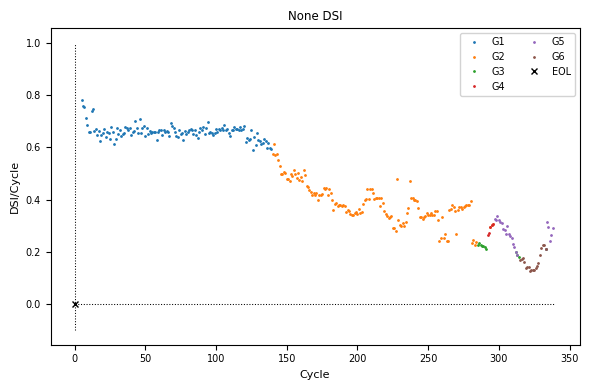

In [36]:
nI,nR,N1,N2,N3,tau,m = [5, 5, 1e-5, 1e-5, 1e-5, 10, 2]
teda = TEDARegressor(nI, nR, nI, N1, N2, N3, tau, m, 0.3, ep=0.1, wta=False)

X = np.array([RS[i:i+nI] for i in range(len(RS)-(nI-1))])
Y = np.array([HI[i:i+nI] for i in range(len(HI)-(nI-1))])
xS = X[1:]
yS = Y[:-1]
zS = Y[1:]

for i in range(len(xS)):
    x, y, z = xS[i], yS[i], zS[i]
    teda.run(x)
    #teda.adapt(y, z)

plot_DSI(teda)

In [5]:
for c in teda.c:
    print('ID:',c.ID,'merge:',c.merge,'n samples:',c.n)

ID: 1 merge: None n samples: 27
ID: 2 merge: None n samples: 48
ID: 3 merge: None n samples: 80
ID: 4 merge: None n samples: 2
